In [1]:
# Load Required Libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import math  as mth

import seaborn as sns   # Seaborn visualizations
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Read DataSet 1 and Dataset 2
rawdataset = pd.read_csv('data\googleplaystore.csv')

# rawreviewdataset = pd.read_csv('DatasetRaw\googleplaystore_user_reviews.csv')

In [4]:
print(rawdataset.columns)
print(rawdataset.shape)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
(10840, 13)


In [5]:
# Remove all duplicate entries
dataset = rawdataset.drop_duplicates(subset=['App'],keep='first')

In [6]:
# Print Shape information of the columns
print(dataset.columns)
print(dataset.shape)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
(9659, 13)


In [7]:

# Iterate each column of Numerical data and Find Number of Null Values in 
totalcols = len(dataset)
for col in dataset.columns:
    percentageempty = dataset[col].isnull().sum(axis=0) / totalcols
    print (col,dataset[col].isnull().sum(axis=0),percentageempty)



App 0 0.0
Category 0 0.0
Rating 1463 0.15146495496428203
Reviews 0 0.0
Size 0 0.0
Installs 0 0.0
Type 1 0.00010353038616834041
Price 0 0.0
Content Rating 0 0.0
Genres 0 0.0
Last Updated 0 0.0
Current Ver 8 0.0008282430893467233
Android Ver 2 0.00020706077233668082


In [8]:
# Drop NaN columns : --- Add filling up Catergory means to Rating column (Next version)
dataset = dataset.drop(['Content Rating','Genres','Last Updated','Current Ver','Android Ver'],axis=1)
print(dataset.shape)





(9659, 8)


In [9]:
print(dataset.dtypes)

App          object
Category     object
Rating      float64
Reviews       int64
Size         object
Installs     object
Type         object
Price        object
dtype: object


In [10]:
# Extract Mean Information across Categories for Size
subsettemp = pd.DataFrame(dataset,columns= ['Size','Category'])
subsettemp['Size'] = subsettemp['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
subsettemp['Size'] = subsettemp['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
subsettemp['Size'] = subsettemp['Size'].apply(lambda x: str(x).replace('Varies with device', 'N/A') if 'Varies with device' in str(x) else x)
subsettemp = subsettemp.replace('N/A',np.NaN)
subsettemp = subsettemp.dropna(subset=['Size'])
subsettemp['Size'] = subsettemp['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)


subsettemp['Size'] = subsettemp['Size'].apply(lambda x: float(x))
SizeMean     = subsettemp.groupby(['Category']).mean()['Size'].to_frame()
del subsettemp

In [11]:
# Extract Mean Information across Categories for Rating
subsettemp = pd.DataFrame(dataset,columns= ['Rating','Category'])
RatingMean = subsettemp.groupby(['Category']).mean()['Rating'].to_frame()
del subsettemp


In [12]:
#dataset['Category'].iloc[1]
SizeMean.loc['BEAUTY']['Size']


13.795744680851065

In [13]:
for i in range(0, len(dataset)):
    if 'Varies with device' in dataset['Size'].iloc[i] :
        dataset['Size'].iloc[i] = str(SizeMean.loc[dataset['Category'].iloc[i]]["Size"])
    if dataset['Rating'].iloc[i] == np.NaN :
        dataset['Rating'].iloc[i] = (RatingMean.loc[dataset['Category'].iloc[i]]["Rating"])
    if mth.isnan(dataset['Rating'].iloc[i]):
        dataset['Rating'].iloc[i] = (RatingMean.loc[dataset['Category'].iloc[i]]["Rating"])
        
    

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
dataset.iloc[20:25]

,App,Category,Rating,Reviews,Size,Installs,Type,Price
20,Logo Maker - Small Business,ART_AND_DESIGN,4.000000,450,14M,"100,000+",Free,0
21,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.100000,654,12M,"100,000+",Free,0
22,Superheroes Wallpapers | 4K Backgrounds,ART_AND_DESIGN,4.700000,7699,4.2M,"500,000+",Free,0
23,Mcqueen Coloring pages,ART_AND_DESIGN,4.357377,61,7.0M,"100,000+",Free,0
24,HD Mickey Minnie Wallpapers,ART_AND_DESIGN,4.700000,118,23M,"50,000+",Free,0


In [15]:
# Clean Number of Installs : (Remove + and ,)
dataset['Installs'] = dataset['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
dataset['Installs'] = dataset['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
dataset['Installs'] = dataset['Installs'].apply(lambda x: float(x))

# Clean size of the App: (Todo: Replace Varies with device with mean from category)
#dataset['Size'] = dataset['Size'].apply(lambda x: str(x).replace('Varies with device', '21.767') if 'Varies with device' in str(x) else x)
dataset['Size'] = dataset['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
dataset['Size'] = dataset['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
dataset['Size'] = dataset['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
dataset['Size'] = dataset['Size'].apply(lambda x: float(x))

# Clean Price information
dataset['Price'] = dataset['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
dataset['Price'] = dataset['Price'].apply(lambda x: float(x))

# Convert Number of Reviews
dataset['Reviews'] = dataset['Reviews'].apply(lambda x: int(x))

# Discard Varies with device size (Replace this in future)
#dataset = dataset.dropna(subset=['Size'])

In [16]:
totalcols = len(dataset)
for col in dataset.columns:
    percentageempty = dataset[col].isnull().sum(axis=0) / totalcols
    print (col,dataset[col].isnull().sum(axis=0),percentageempty)


App 0 0.0
Category 0 0.0
Rating 0 0.0
Reviews 0 0.0
Size 0 0.0
Installs 0 0.0
Type 1 0.00010353038616834041
Price 0 0.0


In [17]:
print(dataset.shape)

(9659, 8)


In [18]:
dataset = dataset.dropna(subset=['Size','Rating','Reviews','Installs','Type','Price'])
print(dataset.shape)

(9658, 8)


In [19]:
# Save this temporary cleaned up dataset for further Analysis
from pandas import ExcelWriter

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('CleanedupData.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
dataset.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()


In [20]:
def pandas2arff(df,filename,wekaname = "pandasdata",cleanstringdata=True,cleannan=True):
    """
    converts the pandas dataframe to a weka compatible file
    df: dataframe in pandas format
    filename: the filename you want the weka compatible file to be in
    wekaname: the name you want to give to the weka dataset (this will be visible to you when you open it in Weka)
    cleanstringdata: clean up data which may have spaces and replace with "_", special characters etc which seem to annoy Weka. 
                     To suppress this, set this to False
    cleannan: replaces all nan values with "?" which is Weka's standard for missing values. 
              To suppress this, set this to False
    """
    import re
    
    def cleanstring(s):
        if s!="?":
            return re.sub('[^A-Za-z0-9]+', "_", str(s))
        else:
            return "?"
            
    dfcopy = df #all cleaning operations get done on this copy

    
    if cleannan!=False:
        dfcopy = dfcopy.fillna(-999999999) #this is so that we can swap this out for "?"
        #this makes sure that certain numerical columns with missing values don't get stuck with "object" type
 
    f = open(filename,"w")
    arffList = []
    arffList.append("@relation " + wekaname + "\n")
    #look at each column's dtype. If it's an "object", make it "nominal" under Weka for now (can be changed in source for dates.. etc)
    for i in range(df.shape[1]):
        if dfcopy.dtypes[i]=='O' or (df.columns[i] in ["Class","CLASS","class"]):
            if cleannan!=False:
                dfcopy.iloc[:,i] = dfcopy.iloc[:,i].replace(to_replace=-999999999, value="?")
            if cleanstringdata!=False:
                dfcopy.iloc[:,i] = dfcopy.iloc[:,i].apply(cleanstring)
            _uniqueNominalVals = [str(_i) for _i in np.unique(dfcopy.iloc[:,i])]
            _uniqueNominalVals = ",".join(_uniqueNominalVals)
            _uniqueNominalVals = _uniqueNominalVals.replace("[","")
            _uniqueNominalVals = _uniqueNominalVals.replace("]","")
            _uniqueValuesString = "{" + _uniqueNominalVals +"}" 
            arffList.append("@attribute " + df.columns[i] + _uniqueValuesString + "\n")
        else:
            arffList.append("@attribute " + df.columns[i] + " real\n") 
            #even if it is an integer, let's just deal with it as a real number for now
    arffList.append("@data\n")           
    for i in range(dfcopy.shape[0]):#instances
        _instanceString = ""
        for j in range(df.shape[1]):#features
                if dfcopy.dtypes[j]=='O':
                    _instanceString+="\"" + str(dfcopy.iloc[i,j]) + "\""
                else:
                    _instanceString+=str(dfcopy.iloc[i,j])
                if j!=dfcopy.shape[1]-1:#if it's not the last feature, add a comma
                    _instanceString+=","
        _instanceString+="\n"
        if cleannan!=False:
            _instanceString = _instanceString.replace("-999999999.0","?") #for numeric missing values
            _instanceString = _instanceString.replace("\"?\"","?") #for categorical missing values
        arffList.append(_instanceString)
    f.writelines(arffList)
    f.close()
    del dfcopy
    return True

In [22]:
pandas2arff(dataset, "Test.arff",wekaname="GooglePlayStoreData",cleanstringdata=True, cleannan=False)

True

In [61]:
# Read second dataset and do a merger
reviews_df = pd.read_csv('DatasetRaw\googleplaystore_user_reviews.csv')
reviews_df = reviews_df.dropna(subset=['Sentiment','Sentiment_Polarity','Sentiment_Subjectivity'])
merged_df = pd.merge(dataset, reviews_df, on = "App", how = "inner")






In [124]:
merged_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2856,AppLock,TOOLS,4.4,6.692984,8.782837,8.0,Free,0.0,There seems HUGE flaw app. Whenever I press sq...,Positive,0.180000,0.376429
2857,AppLock,TOOLS,4.4,6.692984,8.782837,8.0,Free,0.0,Very frustrating last updates. Every time I ph...,Negative,-0.260000,0.533333
2858,AppLock,TOOLS,4.4,6.692984,8.782837,8.0,Free,0.0,Can someone help please? There option hiding a...,Negative,-0.175000,0.550000
2859,AppLock,TOOLS,4.4,6.692984,8.782837,8.0,Free,0.0,There delay lock screen secure app... The scre...,Positive,0.250000,0.326667
2860,AppLock,TOOLS,4.4,6.692984,8.782837,8.0,Free,0.0,This missing basic security. One easily see co...,Negative,-0.138095,0.494048


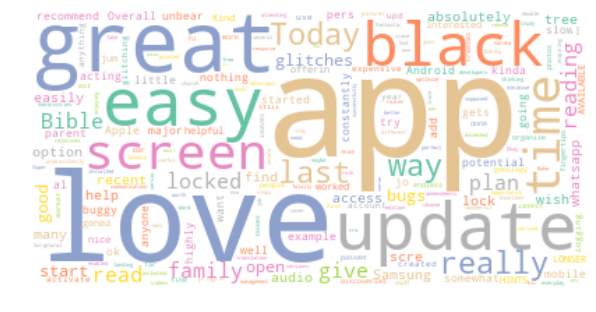

In [75]:
from wordcloud import WordCloud
import nltk

from nltk.corpus import stopwords
set(stopwords.words('english'))

wc = WordCloud(background_color="white", max_words=200, colormap="Set2")
# generate word cloud
stop = stopwords.words('english')
stop = stop + ['app', 'APP' ,'ap', 'App', 'apps', 'application', 'browser', 'website', 'websites', 'chrome', 'click', 'web', 'ip', 'address',
            'files', 'android', 'browse', 'service', 'use', 'one', 'download', 'email', 'Launcher']

#merged_df = merged_df.dropna(subset=['Translated_Review'])
merged_df['Translated_Review'] = merged_df['Translated_Review'].apply(lambda x: " ".join(x for x in str(x).split(' ') if x not in stop))
#print(any(merged_df.Translated_Review.isna()))
merged_df.Translated_Review = merged_df.Translated_Review.apply(lambda x: x if 'app' not in x.split(' ') else np.nan)
merged_df.dropna(subset=['Translated_Review'], inplace=True)





free = merged_df.loc[merged_df.Type=='Free']['Translated_Review'].apply(lambda x: '' if x=='nan' else x)
wc.generate(''.join(str(free)))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


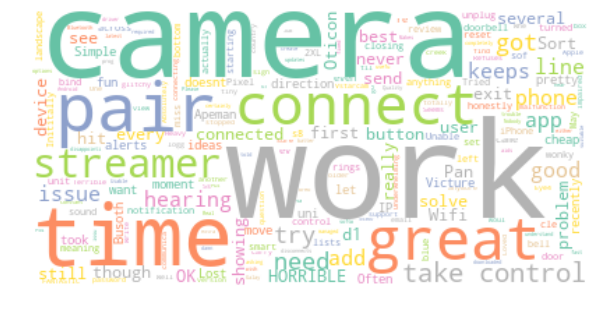

In [178]:
# generate word cloud
stop = stopwords.words('english')
stop = stop + ['love','app', 'APP' ,'ap', 'App', 'apps', 'application', 'browser', 'website', 'websites', 'chrome', 'click', 'web', 'ip', 'address',
            'files', 'android', 'browse', 'service', 'use', 'one', 'download', 'email', 'Launcher']

#merged_df = merged_df.dropna(subset=['Translated_Review'])
merged_df['Translated_Review'] = merged_df['Translated_Review'].apply(lambda x: " ".join(x for x in str(x).split(' ') if x not in stop))
#print(any(merged_df.Translated_Review.isna()))
merged_df.Translated_Review = merged_df.Translated_Review.apply(lambda x: x if 'app' not in x.split(' ') else np.nan)
merged_df.dropna(subset=['Translated_Review'], inplace=True)


#subsetwc = merged_df[merged_df.Category=='SHOPPING']
#subsetwc = subsetwc[subsetwc.Rating < 4.0]

subsetwc = merged_df[merged_df.Rating < 3.25]

free = subsetwc['Translated_Review'].apply(lambda x: '' if x=='nan' else x)
wc.generate(''.join(str(free)))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [88]:
merged_df.shape

(2861, 12)

In [99]:
# Create a Normalized Datasub set for Analysis
columnssubset  = ['App','Category','Rating', 'Reviews', 'Size','Installs','Type','Price']
subsetcleanedNormdf    = pd.DataFrame(dataset,columns=columnssubset)

# Remove data Outliers
subsetcleanedNormdf  = subsetcleanedNormdf[subsetcleanedNormdf["Price"] < 75]
#subsetcleanedNormdf  = subsetcleanedNormdf[subsetcleanedNormdf["Reviews"] < 1000000]
#subsetcleanedNormdf  = subsetcleanedNormdf[subsetcleanedNormdf["Installs"] < 10000000]

def addFractConst(v):
    v += 0.00000001
    return v

def Cnrvlog10(v):
    v = mth.log10(v)
    return v

# Throw outliers in each Category
# Reviews Transform it to log10 after handling zero error
subsetcleanedNormdf['Reviews'] = subsetcleanedNormdf['Reviews'].map(addFractConst)
subsetcleanedNormdf['Reviews'] = subsetcleanedNormdf['Reviews'].map(Cnrvlog10)

subsetcleanedNormdf['Installs'] = subsetcleanedNormdf['Installs'].map(addFractConst)
subsetcleanedNormdf['Installs'] = subsetcleanedNormdf['Installs'].map(Cnrvlog10)

#scaler = MinMaxScaler()
#subsetcleanedNormdf[['Rating', 'Reviews', 'Size','Installs']] = scaler.fit_transform(subsetcleanedNormdf[['Rating', 'Reviews', 'Size','Installs']])

#Save Data for using ML algorithms from Python library
writer = pd.ExcelWriter('CleanupAlgoDevData.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
subsetcleanedNormdf.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

# Save Data
#pandas2arff(subsetcleanedNormdf, "CleanedNormalizedOutliRemov.arff",wekaname="GooglePlayStoreDataNormalized",cleanstringdata=True, cleannan=False)

In [94]:
subsetcleanedNormdf.shape

(9636, 8)

In [100]:
# Read second dataset and do a merger
reviews_df = pd.read_csv('DatasetRaw\googleplaystore_user_reviews.csv')
reviews_df = reviews_df.dropna(subset=['Sentiment','Sentiment_Polarity','Sentiment_Subjectivity'])
merged_df = pd.merge(subsetcleanedNormdf, reviews_df, on = "App", how = "inner")


In [103]:
merged_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Ancestry,BOOKS_AND_REFERENCE,4.3,4.809647,13.134701,6.69897,Free,0.0,"Overall I like app, bugs, nothing major unbear...",Positive,0.268112,0.599490
1,Ancestry,BOOKS_AND_REFERENCE,4.3,4.809647,13.134701,6.69897,Free,0.0,"1. constantly acting I add potential parent, p...",Positive,0.150000,0.516667
2,Ancestry,BOOKS_AND_REFERENCE,4.3,4.809647,13.134701,6.69897,Free,0.0,"I little slow start glitches somewhat, gets jo...",Negative,-0.243750,0.450000
3,Ancestry,BOOKS_AND_REFERENCE,4.3,4.809647,13.134701,6.69897,Free,0.0,Today started going black screen try open pers...,Positive,0.051953,0.491667
4,Ancestry,BOOKS_AND_REFERENCE,4.3,4.809647,13.134701,6.69897,Free,0.0,"It's ok app, also kinda buggy. For example, al...",Positive,0.250000,0.250000
5,Ancestry,BOOKS_AND_REFERENCE,4.3,4.809647,13.134701,6.69897,Free,0.0,The mobile (Apple well Android) really good & ...,Positive,0.183333,0.423333
6,Ancestry,BOOKS_AND_REFERENCE,4.3,4.809647,13.134701,6.69897,Free,0.0,I absolutely love highly recommend anyone want...,Positive,0.310635,0.502857
7,Ancestry,BOOKS_AND_REFERENCE,4.3,4.809647,13.134701,6.69897,Free,0.0,"This worked great, recent update glitches, jum...",Positive,0.400000,0.500000
8,Ancestry,BOOKS_AND_REFERENCE,4.3,4.809647,13.134701,6.69897,Free,0.0,"great app. few, bugs. helpful interested genea...",Positive,0.325000,0.550000
9,Ancestry,BOOKS_AND_REFERENCE,4.3,4.809647,13.134701,6.69897,Free,0.0,"What's ALL ""HINTS NO LONGER AVAILABLE"" offerin...",Positive,0.360000,0.480000


In [121]:
SENT_REVIEW = merged_df.groupby(['Category','Sentiment']).size().unstack()

In [130]:
for i in range(0, len(SENT_REVIEW)):
    TotSum = SENT_REVIEW.iloc[i].Negative + SENT_REVIEW.iloc[i].Positive + SENT_REVIEW.iloc[i].Neutral
    SENT_REVIEW.iloc[i].Positive = 100 * (SENT_REVIEW.iloc[i].Positive/TotSum)
    SENT_REVIEW.iloc[i].Negative = 100 * (SENT_REVIEW.iloc[i].Negative/TotSum)
    SENT_REVIEW.iloc[i].Neutral = 100 * (SENT_REVIEW.iloc[i].Neutral/TotSum)
    


In [131]:
SENT_REVIEW

Sentiment,Negative,Neutral,Positive
Category,,,
BOOKS_AND_REFERENCE,8,10,81
BUSINESS,10,20,69
COMMUNICATION,23,18,57
DATING,5,15,79
EDUCATION,9,14,76
ENTERTAINMENT,32,14,52
FAMILY,47,2,50
FINANCE,26,12,60
FOOD_AND_DRINK,19,8,72


In [165]:
merged_df['Category'].unique()

array(['BOOKS_AND_REFERENCE', 'BUSINESS', 'COMMUNICATION', 'DATING',
       'EDUCATION', 'ENTERTAINMENT', 'FINANCE', 'FOOD_AND_DRINK',
       'HEALTH_AND_FITNESS', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME',
       'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS',
       'TRAVEL_AND_LOCAL', 'TOOLS', 'PRODUCTIVITY', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       'FAMILY'], dtype=object)

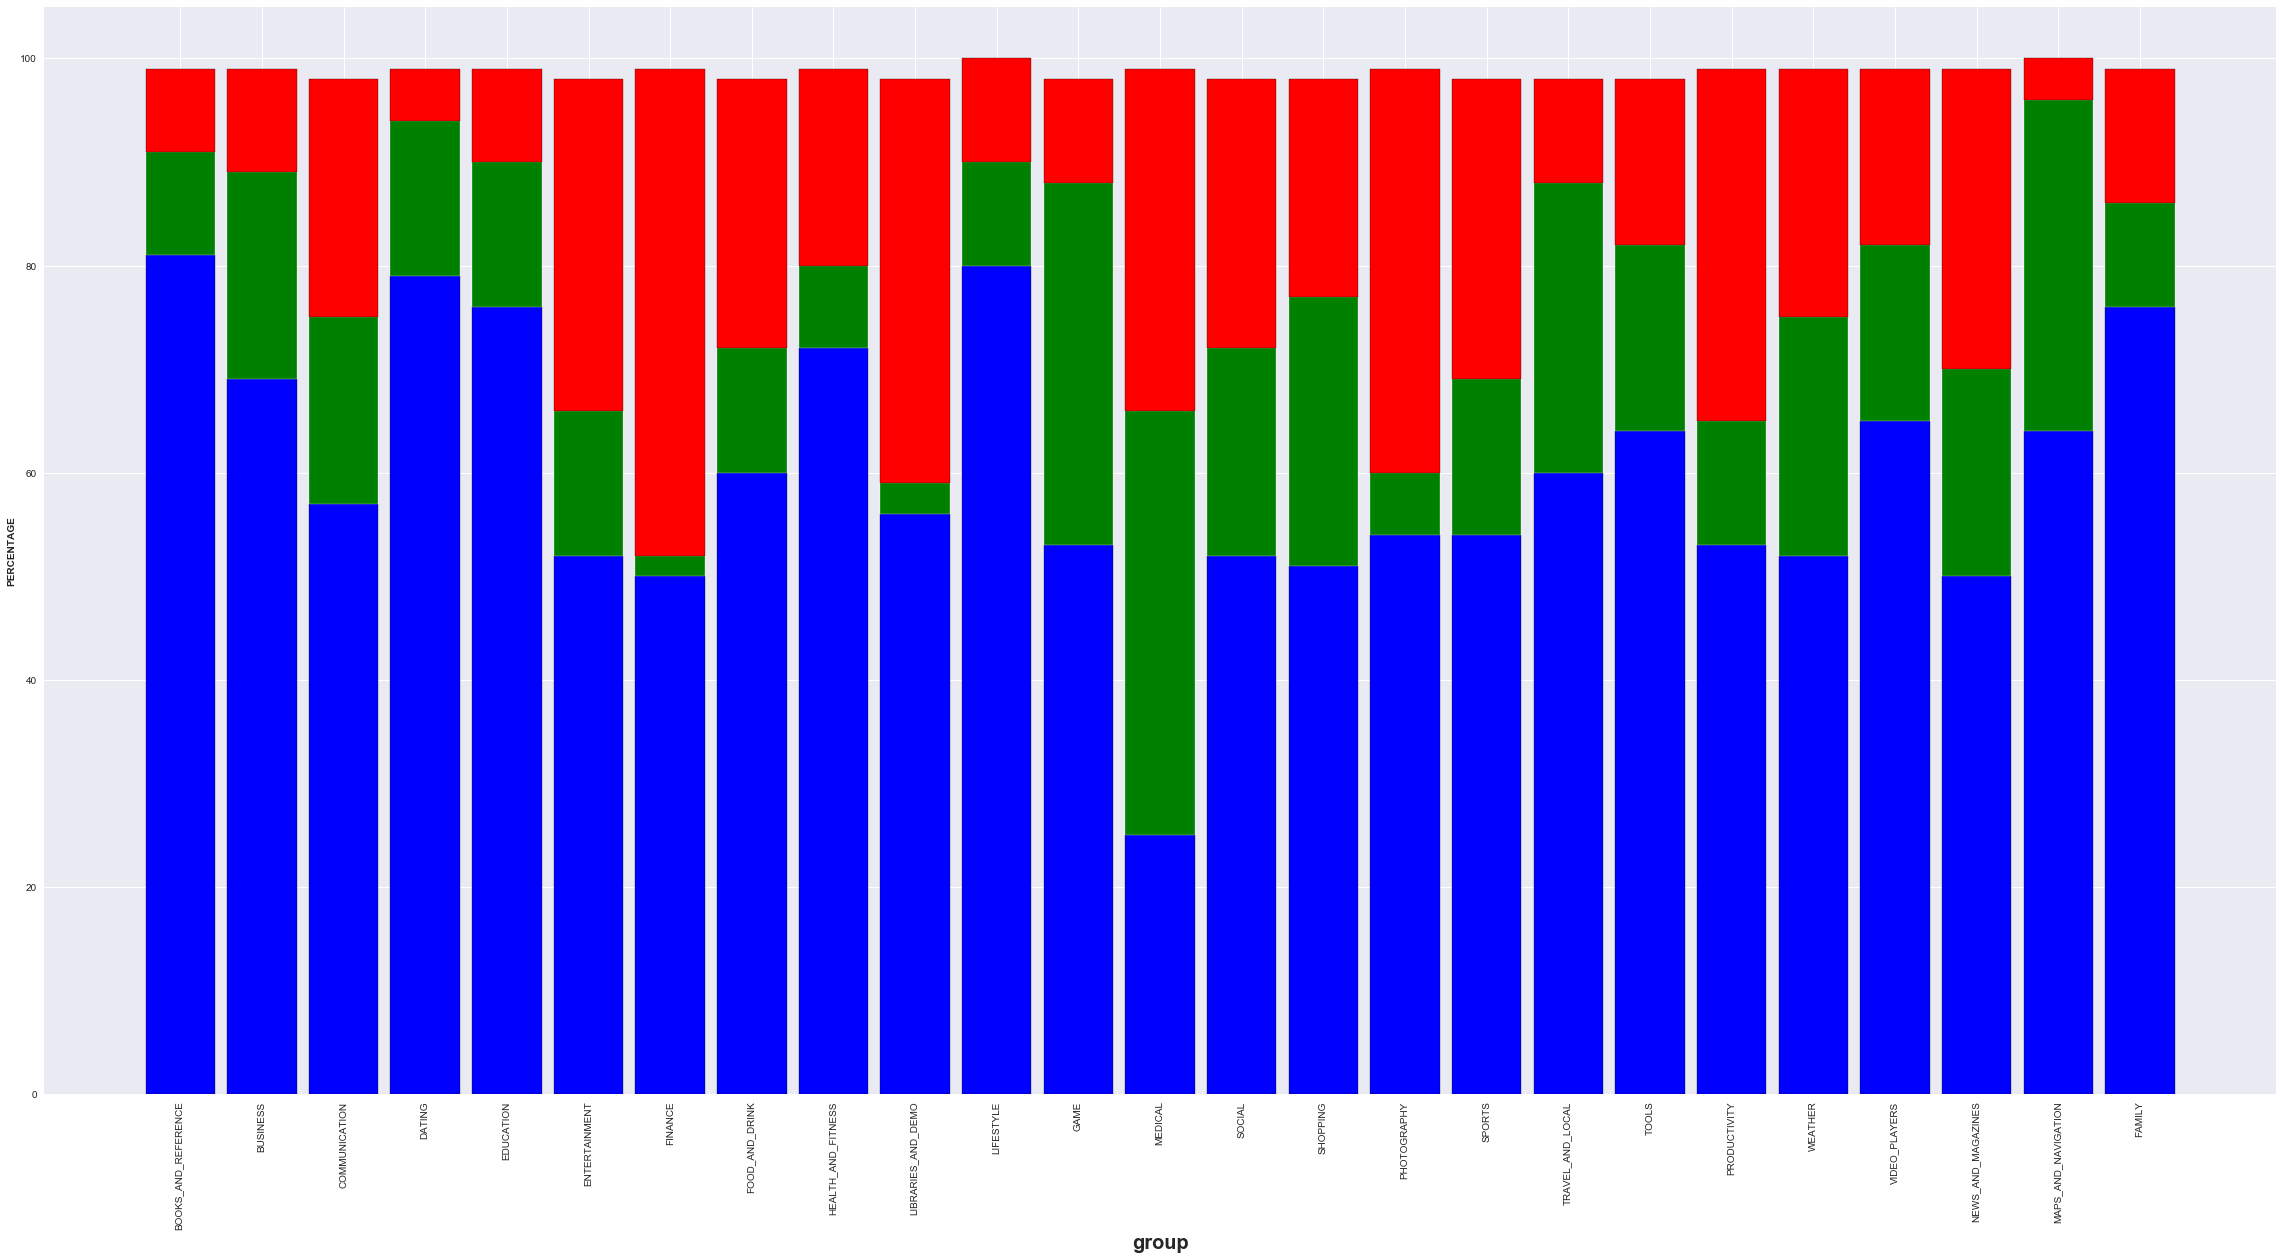

In [170]:
barWidth = 85
fig = plt.figure(figsize=(40,20))

r = range(0,len(SENT_REVIEW['Positive'])*100,100)
# Create green Bars
plt.bar(r, SENT_REVIEW['Positive'], color='blue', edgecolor='black', width=barWidth)
# Create orange Bars
plt.bar(r, SENT_REVIEW['Neutral'], bottom=SENT_REVIEW['Positive'], color='green', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, SENT_REVIEW['Negative'], bottom=[i+j for i,j in zip(SENT_REVIEW['Positive'], SENT_REVIEW['Neutral'])], color='red', edgecolor='black', width=barWidth)
 
# Custom x axis
plt.xticks(r, merged_df['Category'].unique())
plt.xticks(rotation=90)
plt.xlabel("group",fontsize=20, fontweight='bold')
plt.ylabel("PERCENTAGE", fontsize='medium', fontweight='bold')
plt.figure(figsize=(40,20))
 
# Show graphic
plt.show()


In [57]:
# Create a Normalized Datasub set for Analysis
columnssubset  = ['App','Category','Rating', 'Reviews', 'Size','Installs','Type','Price']
subsetcleanedNormdf    = pd.DataFrame(dataset,columns=columnssubset)

# Remove data Outliers
subsetcleanedNormdf  = subsetcleanedNormdf[subsetcleanedNormdf["Price"] < 75]

def addFractConst(v):
    v += 0.00000001
    return v

def Cnrvlog10(v):
    v = mth.log10(v)
    return v

# Throw outliers in each Category
# Reviews Transform it to log10 after handling zero error
subsetcleanedNormdf['Reviews'] = subsetcleanedNormdf['Reviews'].map(addFractConst)
subsetcleanedNormdf['Reviews'] = subsetcleanedNormdf['Reviews'].map(Cnrvlog10)

subsetcleanedNormdf['Installs'] = subsetcleanedNormdf['Installs'].map(addFractConst)
subsetcleanedNormdf['Installs'] = subsetcleanedNormdf['Installs'].map(Cnrvlog10)

#scaler = MinMaxScaler()
#subsetcleanedNormdf[['Rating', 'Reviews', 'Size','Installs']] = scaler.fit_transform(subsetcleanedNormdf[['Rating', 'Reviews', 'Size','Installs']])

# Bin Values 
subsetcleanedNormdf['SizBucket'] = pd.cut(subsetcleanedNormdf['Size'], bins= [0,20,40,60,100], labels=["LightWt","MidWt","Heavy","Bulky"]) 
subsetcleanedNormdf['RateBucket'] = pd.cut(subsetcleanedNormdf['Rating'], bins= [0.01,2,3.25,4.25,5], labels=["POOR","AVERAGE","GOOD","EXCELLENT"])                                           
                      

# Save Data
pandas2arff(subsetcleanedNormdf, "CleanNormOutRmvBinSizRat.arff",wekaname="GooglePlayStoreDataNormalized",cleanstringdata=True, cleannan=False)
subsetcleanedNormdf.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,SizBucket,RateBucket
0,Photo_Editor_Candy_Camera_Grid_ScrapBook,ART_AND_DESIGN,4.1,2.201397,19.0,4.00000,Free,0.0,LightWt,GOOD
1,Coloring_book_moana,ART_AND_DESIGN,3.9,2.985426,14.0,5.69897,Free,0.0,LightWt,GOOD
2,U_Launcher_Lite_FREE_Live_Cool_Themes_Hide_Apps,ART_AND_DESIGN,4.7,4.942058,8.7,6.69897,Free,0.0,LightWt,EXCELLENT
3,Sketch_Draw_Paint,ART_AND_DESIGN,4.5,5.333737,25.0,7.69897,Free,0.0,MidWt,EXCELLENT
4,Pixel_Draw_Number_Art_Coloring_Book,ART_AND_DESIGN,4.3,2.985426,2.8,5.00000,Free,0.0,LightWt,EXCELLENT


In [58]:
subsetcleanedNormdf["SizBucket"].describe()


count        9636
unique          4
top       LightWt
freq         6263
Name: SizBucket, dtype: object